# 線形代数：内積（Inner Product）

このノートブックでは、ベクトルの内積（inner product）について基礎から学びます。

## 目次
1. [内積とは](#内積とは)
2. [数学的な定義](#数学的な定義)
3. [幾何学的な意味](#幾何学的な意味)
4. [内積の性質](#内積の性質)
5. [内積の計算方法](#内積の計算方法)
6. [実装例](#実装例)
7. [可視化](#可視化)
8. [機械学習での応用例](#機械学習での応用例)


---

## 必要なライブラリのインポート


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch, Arc
import seaborn as sns
import matplotlib.font_manager as fm

# 日本語フォントの設定
try:
    jp_fonts = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN', 'Yu Gothic',
                'Noto Sans CJK JP', 'AppleGothic', 'Arial Unicode MS']
    available_fonts = [f.name for f in fm.fontManager.ttflist]

    font_found = False
    for font_name in jp_fonts:
        if font_name in available_fonts:
            plt.rcParams['font.family'] = font_name
            font_found = True
            print(f"Using font: {font_name}")
            break

    if not font_found:
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['font.sans-serif'] = ['Hiragino Sans', 'Hiragino Kaku Gothic ProN',
                                            'Yu Gothic', 'Meiryo', 'MS Gothic', 'DejaVu Sans']
        print("Using fallback font configuration")
except Exception as e:
    print(f"Font configuration warning: {e}")
    plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['mathtext.default'] = 'regular'
plt.rcParams['axes.unicode_minus'] = False
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/opt/anaconda3/lib/python3.12/site-packages/traitlets/config/application.py", line 1075, in launch_instance
    app.start()
  File "/opt/anaconda3/lib/python3.12/site-packages/ipykernel/kernelapp.py", line 701, in start
    self.io_loop.start()
  File "/opt/anaconda3/lib/python3.12/site-

ImportError: 
A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.



Using font: Hiragino Sans


---

## 内積とは

**内積（inner product）**は、2つのベクトルから1つのスカラー値を得る演算です。ドット積（dot product）とも呼ばれます。

### 基本的な考え方

内積は以下のような情報を教えてくれます：
- 2つのベクトルがどの程度「同じ方向」を向いているか
- 1つのベクトルを別のベクトルに「投影」したときの長さ
- 2つのベクトルが直交しているかどうか

### なぜ内積が重要なのか？

- **類似度の測定**: 機械学習で特徴ベクトル間の類似度を計算
- **正射影**: ベクトルを別のベクトルに投影する際に使用
- **角度の計算**: 2つのベクトル間の角度を求める
- **直交性の判定**: 2つのベクトルが垂直かどうかを判定


---

## 数学的な定義

### 2次元・3次元ベクトルの内積

2つのベクトル $\mathbf{a} = (a_1, a_2, \ldots, a_n)$ と $\mathbf{b} = (b_1, b_2, \ldots, b_n)$ の内積は：

$$\mathbf{a} \cdot \mathbf{b} = \sum_{i=1}^{n} a_i b_i = a_1 b_1 + a_2 b_2 + \cdots + a_n b_n$$

### 例：2次元ベクトル

$$\mathbf{a} = \begin{pmatrix} 3 \\ 4 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 1 \\ 2 \end{pmatrix}$$

$$\mathbf{a} \cdot \mathbf{b} = 3 \times 1 + 4 \times 2 = 3 + 8 = 11$$

### 例：3次元ベクトル

$$\mathbf{a} = \begin{pmatrix} 1 \\ 2 \\ 3 \end{pmatrix}, \quad \mathbf{b} = \begin{pmatrix} 4 \\ 5 \\ 6 \end{pmatrix}$$

$$\mathbf{a} \cdot \mathbf{b} = 1 \times 4 + 2 \times 5 + 3 \times 6 = 4 + 10 + 18 = 32$$


In [2]:
# 2次元ベクトルの内積の例
a_2d = np.array([3, 4])
b_2d = np.array([1, 2])

dot_product_2d = np.dot(a_2d, b_2d)
print(f"ベクトル a = {a_2d}")
print(f"ベクトル b = {b_2d}")
print(f"内積 a・b = {dot_product_2d}")
print(f"手計算: 3×1 + 4×2 = {3*1 + 4*2}")

# 3次元ベクトルの内積の例
a_3d = np.array([1, 2, 3])
b_3d = np.array([4, 5, 6])

dot_product_3d = np.dot(a_3d, b_3d)
print(f"\nベクトル a = {a_3d}")
print(f"ベクトル b = {b_3d}")
print(f"内積 a・b = {dot_product_3d}")
print(f"手計算: 1×4 + 2×5 + 3×6 = {1*4 + 2*5 + 3*6}")


ベクトル a = [3 4]
ベクトル b = [1 2]
内積 a・b = 11
手計算: 3×1 + 4×2 = 11

ベクトル a = [1 2 3]
ベクトル b = [4 5 6]
内積 a・b = 32
手計算: 1×4 + 2×5 + 3×6 = 32


---

## 幾何学的な意味

内積には重要な幾何学的な意味があります：

### 1. 角度との関係

2つのベクトル $\mathbf{a}$ と $\mathbf{b}$ の内積は、それらの長さと角度を使って表すことができます：

$$\mathbf{a} \cdot \mathbf{b} = \|\mathbf{a}\| \|\mathbf{b}\| \cos\theta$$

ここで、$\theta$ は2つのベクトル間の角度です。

### 2. 角度の計算

この式を変形すると、角度を求めることができます：

$$\cos\theta = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}$$

$$\theta = \arccos\left(\frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|}\right)$$

### 3. 正射影

ベクトル $\mathbf{a}$ をベクトル $\mathbf{b}$ に投影した長さは：

$$\text{投影長} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{b}\|} = \|\mathbf{a}\| \cos\theta$$

### 4. 直交性

内積が0の場合、2つのベクトルは直交（垂直）しています：

$$\mathbf{a} \cdot \mathbf{b} = 0 \quad \Leftrightarrow \quad \mathbf{a} \perp \mathbf{b}$$


In [3]:
# 角度の計算例
a = np.array([3, 4])
b = np.array([1, 2])

# 内積
dot_product = np.dot(a, b)

# ノルム（長さ）
norm_a = np.linalg.norm(a)
norm_b = np.linalg.norm(b)

# 角度（ラジアン）
cos_theta = dot_product / (norm_a * norm_b)
theta_rad = np.arccos(cos_theta)
theta_deg = np.degrees(theta_rad)

print(f"ベクトル a = {a}, 長さ = {norm_a:.4f}")
print(f"ベクトル b = {b}, 長さ = {norm_b:.4f}")
print(f"内積 a・b = {dot_product}")
print(f"cos(θ) = {cos_theta:.4f}")
print(f"角度 θ = {theta_deg:.2f}度 ({theta_rad:.4f}ラジアン)")

# 正射影の長さ
projection_length = dot_product / norm_b
print(f"\nベクトル a を b に投影した長さ = {projection_length:.4f}")


ベクトル a = [3 4], 長さ = 5.0000
ベクトル b = [1 2], 長さ = 2.2361
内積 a・b = 11
cos(θ) = 0.9839
角度 θ = 10.30度 (0.1799ラジアン)

ベクトル a を b に投影した長さ = 4.9193


---

## 内積の性質

内積には以下の重要な性質があります：

### 1. 交換法則（可換性）

$$\mathbf{a} \cdot \mathbf{b} = \mathbf{b} \cdot \mathbf{a}$$

### 2. 分配法則

$$(\mathbf{a} + \mathbf{b}) \cdot \mathbf{c} = \mathbf{a} \cdot \mathbf{c} + \mathbf{b} \cdot \mathbf{c}$$

### 3. スカラー倍

$$(k\mathbf{a}) \cdot \mathbf{b} = k(\mathbf{a} \cdot \mathbf{b}) = \mathbf{a} \cdot (k\mathbf{b})$$

ここで、$k$ はスカラーです。

### 4. 自分自身との内積

$$\mathbf{a} \cdot \mathbf{a} = \|\mathbf{a}\|^2$$

自分自身との内積は、ベクトルの長さの2乗になります。

### 5. ゼロベクトルとの内積

$$\mathbf{a} \cdot \mathbf{0} = 0$$

任意のベクトルとゼロベクトルの内積は0です。


In [4]:
# 内積の性質を確認
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])
c = np.array([7, 8, 9])
k = 2

print("1. 交換法則")
print(f"a・b = {np.dot(a, b)}")
print(f"b・a = {np.dot(b, a)}")
print(f"一致: {np.dot(a, b) == np.dot(b, a)}")

print("\n2. 分配法則")
print(f"(a + b)・c = {np.dot(a + b, c)}")
print(f"a・c + b・c = {np.dot(a, c) + np.dot(b, c)}")
print(f"一致: {np.allclose(np.dot(a + b, c), np.dot(a, c) + np.dot(b, c))}")

print("\n3. スカラー倍")
print(f"(ka)・b = {np.dot(k * a, b)}")
print(f"k(a・b) = {k * np.dot(a, b)}")
print(f"一致: {np.allclose(np.dot(k * a, b), k * np.dot(a, b))}")

print("\n4. 自分自身との内積")
print(f"a・a = {np.dot(a, a)}")
print(f"||a||² = {np.linalg.norm(a)**2}")
print(f"一致: {np.allclose(np.dot(a, a), np.linalg.norm(a)**2)}")

print("\n5. ゼロベクトルとの内積")
zero = np.zeros(3)
print(f"a・0 = {np.dot(a, zero)}")


1. 交換法則
a・b = 32
b・a = 32
一致: True

2. 分配法則
(a + b)・c = 172
a・c + b・c = 172
一致: True

3. スカラー倍
(ka)・b = 64
k(a・b) = 64
一致: True

4. 自分自身との内積
a・a = 14
||a||² = 14.0
一致: True

5. ゼロベクトルとの内積
a・0 = 0.0


---

## 内積の計算方法

NumPyでは、内積を計算する方法がいくつかあります：

### 1. `np.dot()` 関数

```python
np.dot(a, b)
```

### 2. `@` 演算子（Python 3.5+）

```python
a @ b
```

### 3. `np.inner()` 関数

```python
np.inner(a, b)
```

### 4. 手動計算

```python
np.sum(a * b)
```

**注意**: 1次元配列の場合、`np.dot()` と `@` は内積を計算しますが、2次元配列（行列）の場合は行列積を計算します。


In [5]:
# 内積の計算方法の比較
a = np.array([1, 2, 3])
b = np.array([4, 5, 6])

print("ベクトル a =", a)
print("ベクトル b =", b)
print()

print("1. np.dot(a, b) =", np.dot(a, b))
print("2. a @ b =", a @ b)
print("3. np.inner(a, b) =", np.inner(a, b))
print("4. np.sum(a * b) =", np.sum(a * b))
print()

# すべて同じ結果になることを確認
methods = [
    np.dot(a, b),
    a @ b,
    np.inner(a, b),
    np.sum(a * b)
]
print("すべて同じ結果:", all(np.allclose(methods[0], m) for m in methods))


ベクトル a = [1 2 3]
ベクトル b = [4 5 6]

1. np.dot(a, b) = 32
2. a @ b = 32
3. np.inner(a, b) = 32
4. np.sum(a * b) = 32

すべて同じ結果: True


---

## 実装例

### 例1: 直交性の判定

2つのベクトルが直交しているかどうかを判定します。


In [6]:
# 直交性の判定
def are_orthogonal(a, b, tolerance=1e-10):
    """2つのベクトルが直交しているかどうかを判定"""
    dot_product = np.dot(a, b)
    return abs(dot_product) < tolerance

# 例1: 直交するベクトル
a1 = np.array([1, 0])
b1 = np.array([0, 1])
print(f"a1 = {a1}, b1 = {b1}")
print(f"内積 = {np.dot(a1, b1)}")
print(f"直交: {are_orthogonal(a1, b1)}")

# 例2: 直交しないベクトル
a2 = np.array([1, 1])
b2 = np.array([1, 2])
print(f"\na2 = {a2}, b2 = {b2}")
print(f"内積 = {np.dot(a2, b2)}")
print(f"直交: {are_orthogonal(a2, b2)}")

# 例3: 3次元の直交ベクトル
a3 = np.array([1, 0, 0])
b3 = np.array([0, 1, 0])
c3 = np.array([0, 0, 1])
print(f"\na3 = {a3}, b3 = {b3}, c3 = {c3}")
print(f"a3・b3 = {np.dot(a3, b3)}")
print(f"a3・c3 = {np.dot(a3, c3)}")
print(f"b3・c3 = {np.dot(b3, c3)}")
print(f"すべて直交: {are_orthogonal(a3, b3) and are_orthogonal(a3, c3) and are_orthogonal(b3, c3)}")


a1 = [1 0], b1 = [0 1]
内積 = 0
直交: True

a2 = [1 1], b2 = [1 2]
内積 = 3
直交: False

a3 = [1 0 0], b3 = [0 1 0], c3 = [0 0 1]
a3・b3 = 0
a3・c3 = 0
b3・c3 = 0
すべて直交: True


### 例2: 角度の計算

2つのベクトル間の角度を計算します。


In [7]:
def angle_between_vectors(a, b):
    """2つのベクトル間の角度を計算（ラジアンと度）"""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    # cos(θ) = (a・b) / (||a|| ||b||)
    cos_theta = dot_product / (norm_a * norm_b)

    # 数値誤差を考慮して[-1, 1]の範囲に制限
    cos_theta = np.clip(cos_theta, -1.0, 1.0)

    theta_rad = np.arccos(cos_theta)
    theta_deg = np.degrees(theta_rad)

    return theta_rad, theta_deg

# 様々な角度の例
examples = [
    ("同じ方向", np.array([1, 0]), np.array([2, 0])),
    ("直交", np.array([1, 0]), np.array([0, 1])),
    ("45度", np.array([1, 0]), np.array([1, 1])),
    ("反対方向", np.array([1, 0]), np.array([-1, 0])),
    ("鋭角", np.array([3, 4]), np.array([1, 2])),
]

for name, a, b in examples:
    theta_rad, theta_deg = angle_between_vectors(a, b)
    dot = np.dot(a, b)
    print(f"{name}:")
    print(f"  ベクトル a = {a}, b = {b}")
    print(f"  内積 = {dot:.4f}")
    print(f"  角度 = {theta_deg:.2f}度 ({theta_rad:.4f}ラジアン)")
    print()


同じ方向:
  ベクトル a = [1 0], b = [2 0]
  内積 = 2.0000
  角度 = 0.00度 (0.0000ラジアン)

直交:
  ベクトル a = [1 0], b = [0 1]
  内積 = 0.0000
  角度 = 90.00度 (1.5708ラジアン)

45度:
  ベクトル a = [1 0], b = [1 1]
  内積 = 1.0000
  角度 = 45.00度 (0.7854ラジアン)

反対方向:
  ベクトル a = [1 0], b = [-1  0]
  内積 = -1.0000
  角度 = 180.00度 (3.1416ラジアン)

鋭角:
  ベクトル a = [3 4], b = [1 2]
  内積 = 11.0000
  角度 = 10.30度 (0.1799ラジアン)



### 例3: 正射影の計算

ベクトルを別のベクトルに投影します。


In [8]:
def project_vector(a, b):
    """ベクトル a をベクトル b に投影したベクトルを計算"""
    # 投影ベクトル = (a・b / ||b||²) * b
    dot_product = np.dot(a, b)
    norm_b_sq = np.dot(b, b)

    if norm_b_sq == 0:
        return np.zeros_like(a)

    projection = (dot_product / norm_b_sq) * b
    return projection

# 例
a = np.array([3, 4])
b = np.array([4, 0])

projection = project_vector(a, b)
projection_length = np.linalg.norm(projection)

print(f"ベクトル a = {a}")
print(f"ベクトル b = {b}")
print(f"a を b に投影したベクトル = {projection}")
print(f"投影の長さ = {projection_length:.4f}")
print(f"内積 a・b = {np.dot(a, b)}")
print(f"||b|| = {np.linalg.norm(b):.4f}")
print(f"投影の長さ = (a・b) / ||b|| = {np.dot(a, b) / np.linalg.norm(b):.4f}")


ベクトル a = [3 4]
ベクトル b = [4 0]
a を b に投影したベクトル = [3. 0.]
投影の長さ = 3.0000
内積 a・b = 12
||b|| = 4.0000
投影の長さ = (a・b) / ||b|| = 3.0000


---

## 可視化

内積の幾何学的な意味を可視化します。


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 37613 (\N{CJK UNIFIED IDEOGRAPH-92ED}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1

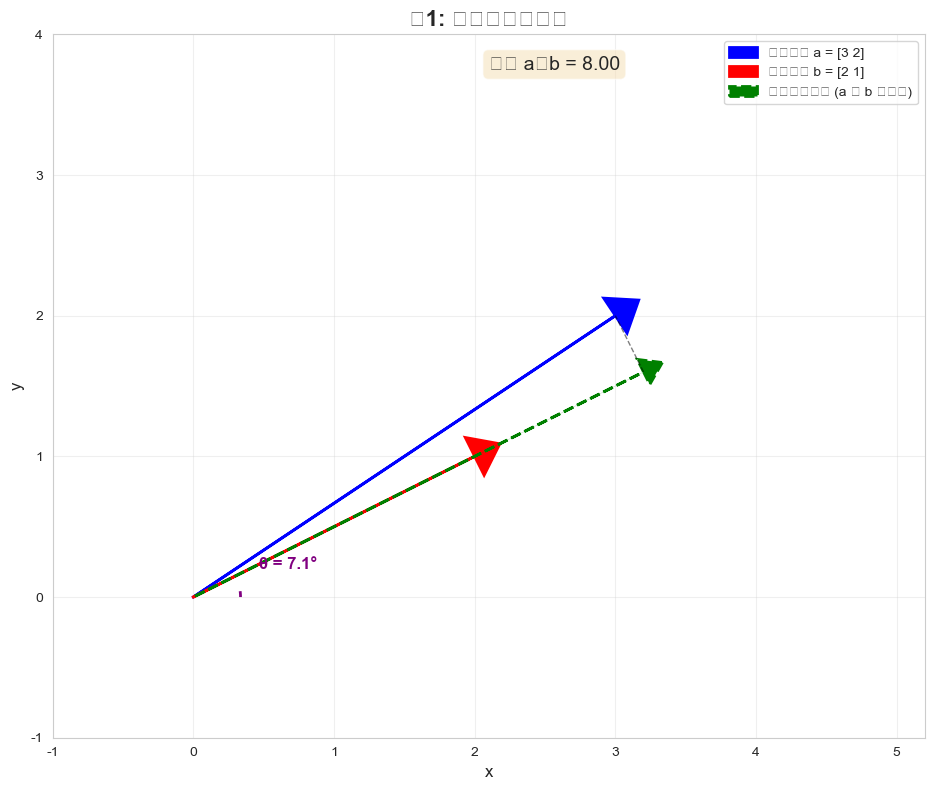

In [9]:
def plot_vectors_with_inner_product(a, b, title=""):
    """2つのベクトルとその内積を可視化"""
    fig, ax = plt.subplots(figsize=(10, 8))

    # ベクトルをプロット
    ax.arrow(0, 0, a[0], a[1], head_width=0.3, head_length=0.2,
             fc='blue', ec='blue', linewidth=2, label=f'ベクトル a = {a}')
    ax.arrow(0, 0, b[0], b[1], head_width=0.3, head_length=0.2,
             fc='red', ec='red', linewidth=2, label=f'ベクトル b = {b}')

    # 正射影をプロット
    projection = project_vector(a, b)
    if np.linalg.norm(projection) > 0:
        ax.arrow(0, 0, projection[0], projection[1], head_width=0.2, head_length=0.15,
                fc='green', ec='green', linewidth=2, linestyle='--',
                label=f'投影ベクトル (a を b に投影)')

        # 投影点から a への線
        ax.plot([projection[0], a[0]], [projection[1], a[1]],
               'k--', linewidth=1, alpha=0.5)

    # 角度の表示
    theta_rad, theta_deg = angle_between_vectors(a, b)
    arc_radius = min(np.linalg.norm(a), np.linalg.norm(b)) * 0.3
    arc = Arc((0, 0), arc_radius, arc_radius, angle=0,
             theta1=0, theta2=np.degrees(theta_rad), color='purple', linewidth=2)
    ax.add_patch(arc)
    ax.text(arc_radius * 0.7, arc_radius * 0.3, f'θ = {theta_deg:.1f}°',
           fontsize=12, color='purple', weight='bold')

    # 内積の値を表示
    dot_product = np.dot(a, b)
    ax.text(0.5, 0.95, f'内積 a・b = {dot_product:.2f}',
           transform=ax.transAxes, fontsize=14,
           bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

    # グリッドと軸の設定
    ax.grid(True, alpha=0.3)
    ax.set_xlim(-1, max(abs(a[0]), abs(b[0]), abs(projection[0])) + 2)
    ax.set_ylim(-1, max(abs(a[1]), abs(b[1]), abs(projection[1])) + 2)
    ax.set_xlabel('x', fontsize=12)
    ax.set_ylabel('y', fontsize=12)
    ax.set_title(title if title else '内積の可視化', fontsize=16, fontweight='bold')
    ax.legend(loc='upper right', fontsize=10)
    ax.set_aspect('equal')
    plt.tight_layout()
    plt.show()

# 例1: 鋭角のベクトル
a1 = np.array([3, 2])
b1 = np.array([2, 1])
plot_vectors_with_inner_product(a1, b1, '例1: 鋭角のベクトル')


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 30452 (\N{CJK UNIFIED IDEOGRAPH-76F4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 20132 (\N{CJK UNIFIED IDEOGRAPH-4EA4}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 12377 (\N{HIRAGANA LETTER SU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 12427 (\N{HIRAGANA LETTER RU}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1

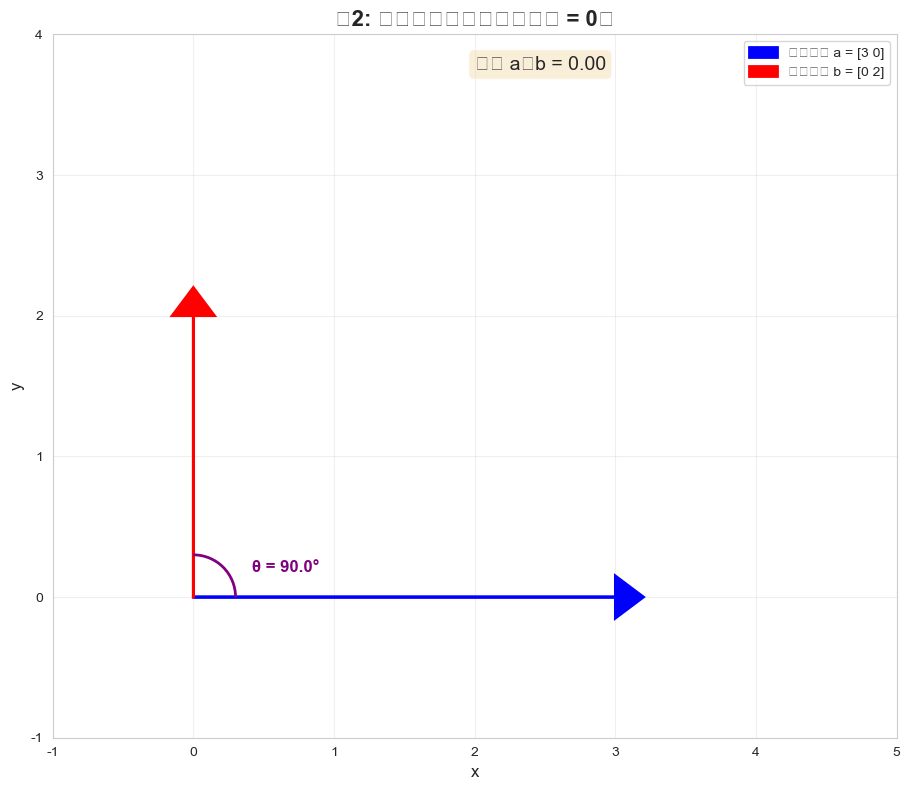

In [10]:
# 例2: 直交するベクトル
a2 = np.array([3, 0])
b2 = np.array([0, 2])
plot_vectors_with_inner_product(a2, b2, '例2: 直交するベクトル（内積 = 0）')


/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 20363 (\N{CJK UNIFIED IDEOGRAPH-4F8B}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 37389 (\N{CJK UNIFIED IDEOGRAPH-920D}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 35282 (\N{CJK UNIFIED IDEOGRAPH-89D2}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 12398 (\N{HIRAGANA LETTER NO}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1487791718.py:46: UserWarning: Glyph 12505 (\N{KATAKANA LETTER BE}) missing from font(s) Arial.
  plt.tight_layout()
/var/folders/tp/_4yg3zh933qf5d3rxn9d519c0000gq/T/ipykernel_95272/1

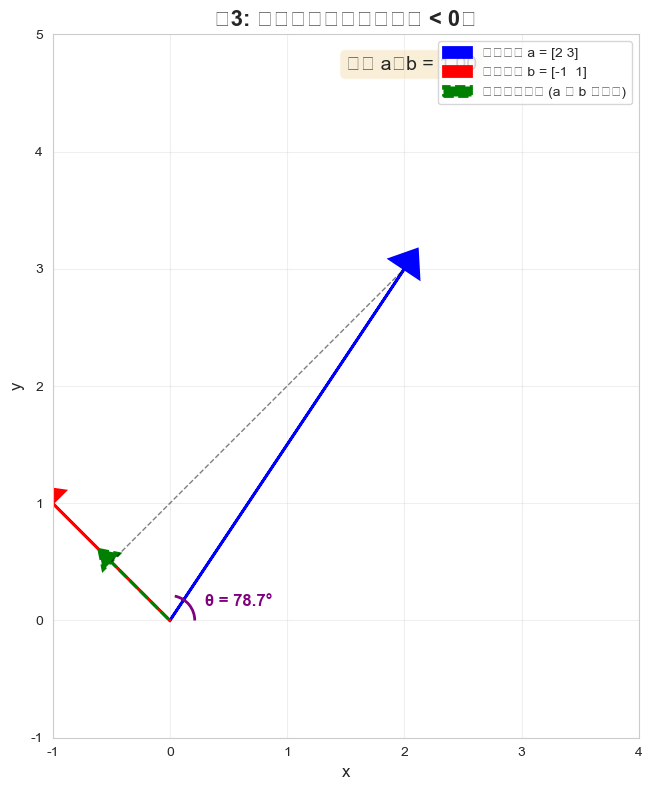

In [11]:
# 例3: 鈍角のベクトル
a3 = np.array([2, 3])
b3 = np.array([-1, 1])
plot_vectors_with_inner_product(a3, b3, '例3: 鈍角のベクトル（内積 < 0）')


---

## 機械学習での応用例

内積は機械学習の多くの場面で使用されます：

### 1. コサイン類似度（Cosine Similarity）

2つのベクトルの類似度を測る指標：

$$\text{cosine similarity} = \frac{\mathbf{a} \cdot \mathbf{b}}{\|\mathbf{a}\| \|\mathbf{b}\|} = \cos\theta$$

値の範囲は $[-1, 1]$ で、1に近いほど類似しています。


In [12]:
def cosine_similarity(a, b):
    """コサイン類似度を計算"""
    dot_product = np.dot(a, b)
    norm_a = np.linalg.norm(a)
    norm_b = np.linalg.norm(b)

    if norm_a == 0 or norm_b == 0:
        return 0

    return dot_product / (norm_a * norm_b)

# 例：文書の類似度（単語頻度ベクトル）
# 文書1: "機械学習 は 面白い"
# 文書2: "機械学習 は 難しい"
# 文書3: "料理 は 楽しい"

# 単語: [機械学習, は, 面白い, 難しい, 料理, 楽しい]
doc1 = np.array([1, 1, 1, 0, 0, 0])  # 機械学習, は, 面白い
doc2 = np.array([1, 1, 0, 1, 0, 0])  # 機械学習, は, 難しい
doc3 = np.array([0, 1, 0, 0, 1, 1])  # は, 料理, 楽しい

sim_12 = cosine_similarity(doc1, doc2)
sim_13 = cosine_similarity(doc1, doc3)
sim_23 = cosine_similarity(doc2, doc3)

print("文書間のコサイン類似度:")
print(f"文書1 と 文書2: {sim_12:.4f} (同じトピック: 機械学習)")
print(f"文書1 と 文書3: {sim_13:.4f} (異なるトピック)")
print(f"文書2 と 文書3: {sim_23:.4f} (異なるトピック)")


文書間のコサイン類似度:
文書1 と 文書2: 0.6667 (同じトピック: 機械学習)
文書1 と 文書3: 0.3333 (異なるトピック)
文書2 と 文書3: 0.3333 (異なるトピック)


### 2. 線形回帰の正規方程式

線形回帰では、内積を使ってパラメータを計算します：

$$\boldsymbol{\theta} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$$

ここで、$\mathbf{X}^T \mathbf{X}$ は内積の行列です。


In [13]:
# 簡単な線形回帰の例
# y = 2x + 1 + noise のデータを生成
np.random.seed(42)
x = np.linspace(0, 10, 20)
y_true = 2 * x + 1
y = y_true + np.random.normal(0, 1, len(x))

# データ行列 X を作成（バイアス項を含む）
X = np.column_stack([x, np.ones(len(x))])

# 正規方程式: θ = (X^T X)^(-1) X^T y
# X^T X は各特徴量間の内積の行列
XTX = X.T @ X  # 内積の行列
XTy = X.T @ y  # X^T と y の内積
theta = np.linalg.solve(XTX, XTy)

print("線形回帰のパラメータ（正規方程式を使用）:")
print(f"傾き: {theta[0]:.4f} (真の値: 2.0)")
print(f"切片: {theta[1]:.4f} (真の値: 1.0)")
print(f"\nX^T X (内積の行列):")
print(XTX)


線形回帰のパラメータ（正規方程式を使用）:
傾き: 1.8108 (真の値: 2.0)
切片: 1.7746 (真の値: 1.0)

X^T X (内積の行列):
[[684.21052632 100.        ]
 [100.          20.        ]]


### 3. ニューラルネットワークの活性化関数

ニューラルネットワークでは、各層で重みベクトルと入力ベクトルの内積を計算します：

$$z = \mathbf{w} \cdot \mathbf{x} + b$$

ここで、$\mathbf{w}$ は重みベクトル、$\mathbf{x}$ は入力ベクトル、$b$ はバイアスです。


In [14]:
# シンプルなニューラルネットワークの層の計算
def neural_network_layer(x, w, b, activation='relu'):
    """ニューラルネットワークの1層の計算"""
    # 内積: z = w・x + b
    z = np.dot(w, x) + b

    # 活性化関数
    if activation == 'relu':
        a = np.maximum(0, z)
    elif activation == 'sigmoid':
        a = 1 / (1 + np.exp(-z))
    else:
        a = z

    return z, a

# 例
input_size = 3
hidden_size = 4

# 入力ベクトル
x = np.array([0.5, 0.3, 0.8])

# 重み行列（各ニューロンが1つの重みベクトルを持つ）
W = np.random.randn(hidden_size, input_size)
b = np.random.randn(hidden_size)

print("入力ベクトル x =", x)
print(f"\n重み行列 W の形状: {W.shape}")
print(f"バイアスベクトル b = {b}")

# 各ニューロンでの計算
print("\n各ニューロンでの計算:")
for i in range(hidden_size):
    z, a = neural_network_layer(x, W[i], b[i], activation='relu')
    print(f"ニューロン {i+1}: z = w・x + b = {z:.4f}, 活性化後 a = {a:.4f}")


入力ベクトル x = [0.5 0.3 0.8]

重み行列 W の形状: (4, 3)
バイアスベクトル b = [-0.01349722 -1.05771093  0.82254491 -1.22084365]

各ニューロンでの計算:
ニューロン 1: z = w・x + b = 0.7056, 活性化後 a = 0.7056
ニューロン 2: z = w・x + b = -1.8447, 活性化後 a = 0.0000
ニューロン 3: z = w・x + b = -0.1208, 活性化後 a = 0.0000
ニューロン 4: z = w・x + b = -0.0654, 活性化後 a = 0.0000


### 4. サポートベクターマシン（SVM）

SVMでは、カーネル関数（多くの場合、内積の関数）を使って特徴空間での分類を行います。

### 5. 主成分分析（PCA）

PCAでは、データの共分散行列（内積の行列）の固有ベクトルを計算して次元削減を行います。

---

## まとめ

内積は線形代数の基礎的な概念であり、以下の重要な役割を果たします：

1. **角度の測定**: 2つのベクトル間の角度を計算
2. **類似度の測定**: コサイン類似度などで使用
3. **投影**: ベクトルを別のベクトルに投影
4. **直交性の判定**: 2つのベクトルが垂直かどうかを判定
5. **機械学習の基礎**: 多くのアルゴリズムで内積が使用される

内積を理解することで、線形代数と機械学習の多くの概念をより深く理解できるようになります。
